In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.tseries.holiday import USFederalHolidayCalendar

# Load the dataset
data = pd.read_csv('data/chickendailysales.csv')
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format='%d/%m/%Y')

# Create holiday calendar and add holiday column
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=data['date'].min(), end=data['date'].max())
data['is_holiday'] = data['date'].isin(holidays).astype(int)

# # Previous visualizations commented out
# top_sales_days = data.sort_values('sales', ascending=False).head(10)

# plt.figure(figsize=(15, 6))
# bars = plt.bar(top_sales_days['date'].dt.strftime('%Y-%m-%d'),
#                top_sales_days['sales'],
#                color=['red' if h else 'skyblue' for h in top_sales_days['is_holiday']])
# plt.title('Top 10 Days with Highest Sales (Red bars indicate holidays)')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

# monthly_sales = data.groupby(data['date'].dt.strftime('%Y-%m'))['sales'].mean()

# plt.figure(figsize=(15, 6))
# plt.plot(range(len(monthly_sales)), monthly_sales.values, marker='o')
# plt.title('Monthly Average Sales Trend')
# plt.xlabel('Month')
# plt.ylabel('Average Sales')
# plt.xticks(range(len(monthly_sales)), monthly_sales.index, rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# New weekday vs weekend analysis
data['is_weekend'] = data['date'].dt.dayofweek.isin([5, 6]).astype(int)

# Create separate dataframes for weekdays and weekends
weekday_sales = data[data['is_weekend'] == 0][['date', 'sales']].set_index('date')
weekend_sales = data[data['is_weekend'] == 1][['date', 'sales']].set_index('date')

# Calculate rolling means (28 days = 4 weeks to smooth the trend)
weekday_rolling = weekday_sales['sales'].rolling(window=28, min_periods=1).mean()
weekend_rolling = weekend_sales['sales'].rolling(window=28, min_periods=1).mean()

# Plot the trends
plt.figure(figsize=(15, 8))

# Plot raw data points (small and transparent)
plt.scatter(weekday_sales.index, weekday_sales['sales'],
           alpha=0.1, color='blue', label='Weekday Sales')
plt.scatter(weekend_sales.index, weekend_sales['sales'],
           alpha=0.1, color='red', label='Weekend Sales')

# Plot rolling means
plt.plot(weekday_rolling.index, weekday_rolling.values,
         color='blue', linewidth=2, label='Weekday Rolling Mean')
plt.plot(weekend_rolling.index, weekend_rolling.values,
         color='red', linewidth=2, label='Weekend Rolling Mean')

plt.title('Weekday vs Weekend Sales Trends (28-day Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print average sales for weekdays and weekends
print(f"\nAverage Weekday Sales: {weekday_sales['sales'].mean():.2f}")
print(f"Average Weekend Sales: {weekend_sales['sales'].mean():.2f}")

ModuleNotFoundError: No module named 'plotly'

In [4]:
# ... (keep all previous code the same) ...

# After the previous visualizations and prints, add:

# Monthly comparison of weekday vs weekend sales
print("\nDetailed Monthly Comparison of Weekday vs Weekend Sales:")
print("-" * 50)

# Add month to both dataframes
weekday_sales['month'] = weekday_sales.index.strftime('%Y-%m')
weekend_sales['month'] = weekend_sales.index.strftime('%Y-%m')

# Calculate monthly averages for both
monthly_weekday = weekday_sales.groupby('month')['sales'].mean()
monthly_weekend = weekend_sales.groupby('month')['sales'].mean()

# Compare each month
for month in sorted(monthly_weekday.index):
    weekday_avg = monthly_weekday[month]
    weekend_avg = monthly_weekend[month]
    difference = weekend_avg - weekday_avg

    print(f"\nMonth: {month}")
    print(f"Average Weekday Sales: {weekday_avg:.2f}")
    print(f"Average Weekend Sales: {weekend_avg:.2f}")

    if difference > 0:
        print(f"Weekend sales were higher by {difference:.2f}")
    else:
        print(f"Weekday sales were higher by {abs(difference):.2f}")


Detailed Monthly Comparison of Weekday vs Weekend Sales:
--------------------------------------------------

Month: 2015-01
Average Weekday Sales: 29.95
Average Weekend Sales: 28.22
Weekday sales were higher by 1.73

Month: 2015-02
Average Weekday Sales: 30.55
Average Weekend Sales: 33.00
Weekend sales were higher by 2.45

Month: 2015-03
Average Weekday Sales: 33.91
Average Weekend Sales: 27.56
Weekday sales were higher by 6.35

Month: 2015-04
Average Weekday Sales: 31.55
Average Weekend Sales: 28.75
Weekday sales were higher by 2.80

Month: 2015-05
Average Weekday Sales: 30.81
Average Weekend Sales: 29.20
Weekday sales were higher by 1.61

Month: 2015-06
Average Weekday Sales: 31.77
Average Weekend Sales: 26.38
Weekday sales were higher by 5.40

Month: 2015-07
Average Weekday Sales: 32.13
Average Weekend Sales: 28.00
Weekday sales were higher by 4.13

Month: 2015-08
Average Weekday Sales: 31.14
Average Weekend Sales: 28.00
Weekday sales were higher by 3.14

Month: 2015-09
Average Wee

In [6]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas.tseries.holiday import USFederalHolidayCalendar

# Load the dataset
data = pd.read_csv('data/chickendailysales.csv')
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format='%d/%m/%Y')

# Create holiday calendar and add holiday column
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=data['date'].min(), end=data['date'].max())
data['is_holiday'] = data['date'].isin(holidays).astype(int)

# New weekday vs weekend analysis
data['is_weekend'] = data['date'].dt.dayofweek.isin([5, 6]).astype(int)

# Create separate dataframes for weekdays and weekends
weekday_sales = data[data['is_weekend'] == 0][['date', 'sales']].set_index('date')
weekend_sales = data[data['is_weekend'] == 1][['date', 'sales']].set_index('date')

# Calculate rolling means
weekday_rolling = weekday_sales['sales'].rolling(window=28, min_periods=1).mean()
weekend_rolling = weekend_sales['sales'].rolling(window=28, min_periods=1).mean()

# Create interactive plot
fig = go.Figure()

# Add scatter plots for raw data
fig.add_trace(
    go.Scatter(x=weekday_sales.index, y=weekday_sales['sales'],
               mode='markers', name='Weekday Sales',
               marker=dict(size=4, opacity=0.3, color='blue'),
               hovertemplate='Date: %{x}<br>Sales: %{y:,.0f}<extra></extra>')
)

fig.add_trace(
    go.Scatter(x=weekend_sales.index, y=weekend_sales['sales'],
               mode='markers', name='Weekend Sales',
               marker=dict(size=4, opacity=0.3, color='red'),
               hovertemplate='Date: %{x}<br>Sales: %{y:,.0f}<extra></extra>')
)

# Add lines for rolling means
fig.add_trace(
    go.Scatter(x=weekday_rolling.index, y=weekday_rolling.values,
               mode='lines', name='Weekday Rolling Mean',
               line=dict(color='blue', width=2),
               hovertemplate='Date: %{x}<br>Rolling Mean: %{y:,.0f}<extra></extra>')
)

fig.add_trace(
    go.Scatter(x=weekend_rolling.index, y=weekend_rolling.values,
               mode='lines', name='Weekend Rolling Mean',
               line=dict(color='red', width=2),
               hovertemplate='Date: %{x}<br>Rolling Mean: %{y:,.0f}<extra></extra>')
)

# Update layout
fig.update_layout(
    title='Weekday vs Weekend Sales Trends (28-day Rolling Mean)',
    xaxis_title='Date',
    yaxis_title='Sales',
    hovermode='x unified',
    showlegend=True,
    template='plotly_white'
)

# Show the interactive plot
fig.show()

# Print average sales for weekdays and weekends
print(f"\nAverage Weekday Sales: {weekday_sales['sales'].mean():.2f}")
print(f"Average Weekend Sales: {weekend_sales['sales'].mean():.2f}")

# Monthly comparison of weekday vs weekend sales
print("\nDetailed Monthly Comparison of Weekday vs Weekend Sales:")
print("-" * 50)

# Add month to both dataframes
weekday_sales['month'] = weekday_sales.index.strftime('%Y-%m')
weekend_sales['month'] = weekend_sales.index.strftime('%Y-%m')

# Calculate monthly averages for both
monthly_weekday = weekday_sales.groupby('month')['sales'].mean()
monthly_weekend = weekend_sales.groupby('month')['sales'].mean()

# Compare each month
for month in sorted(monthly_weekday.index):
    weekday_avg = monthly_weekday[month]
    weekend_avg = monthly_weekend[month]
    difference = weekend_avg - weekday_avg

    print(f"\nMonth: {month}")
    print(f"Average Weekday Sales: {weekday_avg:.2f}")
    print(f"Average Weekend Sales: {weekend_avg:.2f}")

    if difference > 0:
        print(f"Weekend sales were higher by {difference:.2f}")
    else:
        print(f"Weekday sales were higher by {abs(difference):.2f}")


Average Weekday Sales: 31.17
Average Weekend Sales: 30.11

Detailed Monthly Comparison of Weekday vs Weekend Sales:
--------------------------------------------------

Month: 2015-01
Average Weekday Sales: 29.95
Average Weekend Sales: 28.22
Weekday sales were higher by 1.73

Month: 2015-02
Average Weekday Sales: 30.55
Average Weekend Sales: 33.00
Weekend sales were higher by 2.45

Month: 2015-03
Average Weekday Sales: 33.91
Average Weekend Sales: 27.56
Weekday sales were higher by 6.35

Month: 2015-04
Average Weekday Sales: 31.55
Average Weekend Sales: 28.75
Weekday sales were higher by 2.80

Month: 2015-05
Average Weekday Sales: 30.81
Average Weekend Sales: 29.20
Weekday sales were higher by 1.61

Month: 2015-06
Average Weekday Sales: 31.77
Average Weekend Sales: 26.38
Weekday sales were higher by 5.40

Month: 2015-07
Average Weekday Sales: 32.13
Average Weekend Sales: 28.00
Weekday sales were higher by 4.13

Month: 2015-08
Average Weekday Sales: 31.14
Average Weekend Sales: 28.00
We

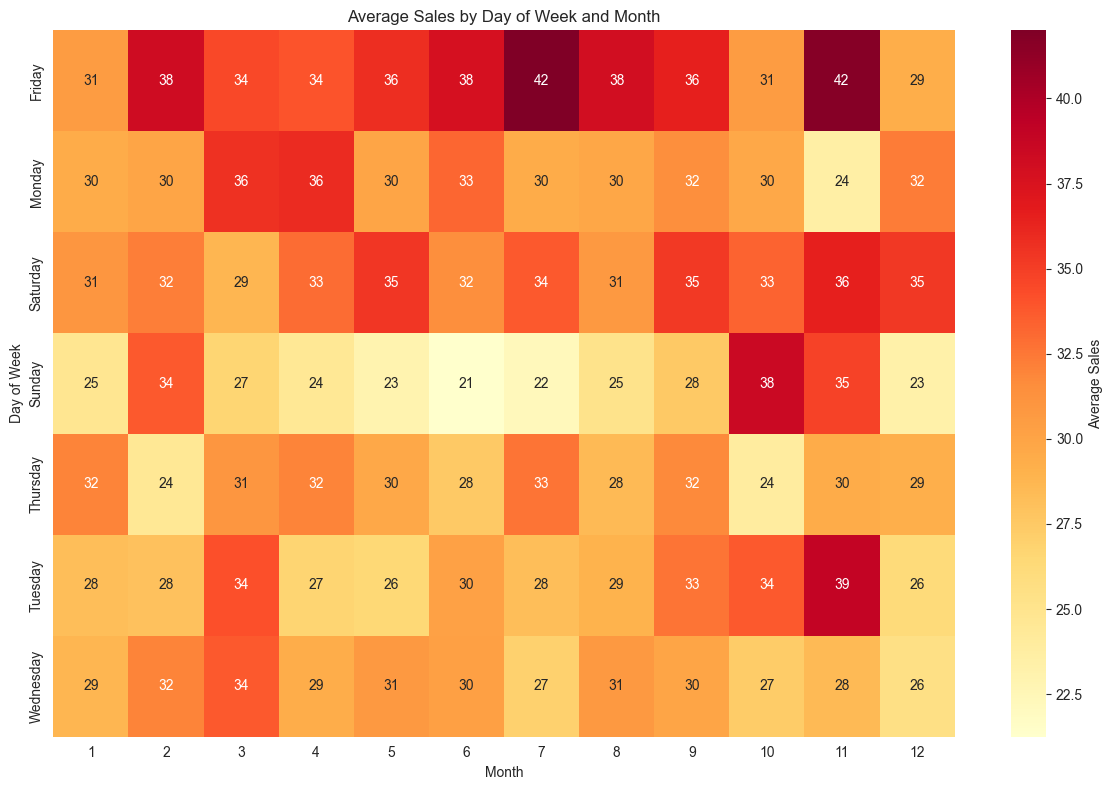

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/chickendailysales.csv')
data['date'] = pd.to_datetime(data['date'], dayfirst=True, format='%d/%m/%Y')

# Create pivot table for heatmap (day of week vs month)
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.day_name()

# Create pivot table of average sales
heatmap_data = data.pivot_table(
    values='sales',
    index='day_of_week',
    columns='month',
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data,
            cmap='YlOrRd',
            annot=True,
            fmt='.0f',
            cbar_kws={'label': 'Average Sales'})

plt.title('Average Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

# Load the new dataset
holiday_data = pd.read_csv('data/raw/salesdata.csv')
holiday_data['date'] = pd.to_datetime(holiday_data['date'])

# Create holiday calendar and add holiday column
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=holiday_data['date'].min(), end=holiday_data['date'].max())
holiday_data['is_holiday'] = holiday_data['date'].isin(holidays).astype(int)

# Add day of week column (0 = Monday, 6 = Sunday)
holiday_data['dayofweek'] = holiday_data['date'].dt.dayofweek
holiday_data['week'] = holiday_data['date'].dt.isocalendar().week

# Filter weekdays only (Monday-Friday)
weekday_data = holiday_data[holiday_data['dayofweek'] < 5].copy()

# For each holiday that falls on a weekday
weekday_holidays = weekday_data[weekday_data['is_holiday'] == 1]

for _, holiday in weekday_holidays.iterrows():
    # Get the same week's data
    same_week = weekday_data[weekday_data['week'] == holiday['week']]

    # Calculate mean sales for non-holiday weekdays in the same week
    weekly_mean = same_week[
        (same_week['is_holiday'] == 0)
    ]['sales'].mean()

    # Calculate percentage difference
    holiday_sales = holiday['sales']
    percent_diff = ((holiday_sales - weekly_mean) / weekly_mean) * 100

    print(f"\nHoliday Date: {holiday['date'].strftime('%Y-%m-%d')}")
    print(f"Holiday Sales: ${holiday_sales:,.2f}")
    print(f"Weekly Weekday Average (excluding holiday): ${weekly_mean:,.2f}")
    print(f"Difference: {percent_diff:,.2f}%")
    print("Sales were", "higher" if percent_diff > 0 else "lower", "than the weekly average")



Holiday Date: 2015-01-01
Holiday Sales: $36.00
Weekly Weekday Average (excluding holiday): $32.00
Difference: 12.50%
Sales were higher than the weekly average

Holiday Date: 2015-01-19
Holiday Sales: $33.00
Weekly Weekday Average (excluding holiday): $30.75
Difference: 7.32%
Sales were higher than the weekly average

Holiday Date: 2015-02-16
Holiday Sales: $28.00
Weekly Weekday Average (excluding holiday): $36.00
Difference: -22.22%
Sales were lower than the weekly average

Holiday Date: 2015-05-25
Holiday Sales: $23.00
Weekly Weekday Average (excluding holiday): $29.00
Difference: -20.69%
Sales were lower than the weekly average

Holiday Date: 2015-07-03
Holiday Sales: $49.00
Weekly Weekday Average (excluding holiday): $26.00
Difference: 88.46%
Sales were higher than the weekly average

Holiday Date: 2015-09-07
Holiday Sales: $32.00
Weekly Weekday Average (excluding holiday): $31.75
Difference: 0.79%
Sales were higher than the weekly average

Holiday Date: 2015-10-12
Holiday Sales: $

In [10]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

# Load the new dataset
holiday_data = pd.read_csv('data/raw/salesdata.csv')
holiday_data['date'] = pd.to_datetime(holiday_data['date'])

# Create holiday calendar and add holiday column
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=holiday_data['date'].min(), end=holiday_data['date'].max())
holiday_data['is_holiday'] = holiday_data['date'].isin(holidays).astype(int)

# Add day of week column (0 = Monday, 6 = Sunday)
holiday_data['dayofweek'] = holiday_data['date'].dt.dayofweek
holiday_data['week'] = holiday_data['date'].dt.isocalendar().week

# Dictionary to map dayofweek numbers to day names
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Find all holidays
holidays_data = holiday_data[holiday_data['is_holiday'] == 1]

for _, holiday in holidays_data.iterrows():
    day_name = day_names[holiday['dayofweek']]

    if holiday['dayofweek'] < 5:  # Weekday holiday
        # Get the same week's weekday data
        same_week = holiday_data[
            (holiday_data['week'] == holiday['week']) &
            (holiday_data['dayofweek'] < 5)
        ]

        # Calculate mean sales for non-holiday weekdays in the same week
        weekly_mean = same_week[
            same_week['is_holiday'] == 0
        ]['sales'].mean()

        print(f"\nHoliday Date: {holiday['date'].strftime('%Y-%m-%d')} ({day_name})")
        print("Type: Weekday Holiday")
        print(f"Holiday Sales: ${holiday['sales']:,.2f}")
        print(f"Weekly Weekday Average (excluding holiday): ${weekly_mean:,.2f}")

    else:  # Weekend holiday
        # Get the other weekend day's sales from the same week
        same_week_weekend = holiday_data[
            (holiday_data['week'] == holiday['week']) &
            (holiday_data['dayofweek'] >= 5)
        ]
        other_weekend_day = same_week_weekend[
            same_week_weekend['date'] != holiday['date']
        ]['sales'].iloc[0]

        print(f"\nHoliday Date: {holiday['date'].strftime('%Y-%m-%d')} ({day_name})")
        print("Type: Weekend Holiday")
        print(f"Holiday Sales: ${holiday['sales']:,.2f}")
        print(f"Other Weekend Day Sales: ${other_weekend_day:,.2f}")

    # Calculate and show percentage difference
    if holiday['dayofweek'] < 5:
        comparison_value = weekly_mean
    else:
        comparison_value = other_weekend_day

    percent_diff = ((holiday['sales'] - comparison_value) / comparison_value) * 100
    print(f"Difference: {percent_diff:,.2f}%")
    print("Sales were", "higher" if percent_diff > 0 else "lower", "than the comparison day(s)")



Holiday Date: 2015-01-01 (Thursday)
Type: Weekday Holiday
Holiday Sales: $36.00
Weekly Weekday Average (excluding holiday): $32.00
Difference: 12.50%
Sales were higher than the comparison day(s)

Holiday Date: 2015-01-19 (Monday)
Type: Weekday Holiday
Holiday Sales: $33.00
Weekly Weekday Average (excluding holiday): $30.75
Difference: 7.32%
Sales were higher than the comparison day(s)

Holiday Date: 2015-02-16 (Monday)
Type: Weekday Holiday
Holiday Sales: $28.00
Weekly Weekday Average (excluding holiday): $36.00
Difference: -22.22%
Sales were lower than the comparison day(s)

Holiday Date: 2015-05-25 (Monday)
Type: Weekday Holiday
Holiday Sales: $23.00
Weekly Weekday Average (excluding holiday): $29.00
Difference: -20.69%
Sales were lower than the comparison day(s)

Holiday Date: 2015-07-03 (Friday)
Type: Weekday Holiday
Holiday Sales: $49.00
Weekly Weekday Average (excluding holiday): $26.00
Difference: 88.46%
Sales were higher than the comparison day(s)

Holiday Date: 2015-09-07 (Mo

In [13]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar

# Extended mapping to handle more variations
day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6,
    'weekday': 7,
    'weekend': 8,
    'Mon': 0,
    'Tue': 1,
    'Wed': 2,
    'Thu': 3,
    'Fri': 4,
    'Sat': 5,
    'Sun': 6
}

# Load the new dataset
holiday_data = pd.read_csv('data/raw/salesdata.csv')

# Convert any day name columns to numeric
for column in holiday_data.columns:
    if holiday_data[column].dtype == 'object':  # Check if column contains strings
        # Try to convert day names to numbers if present
        if holiday_data[column].str.lower().isin([x.lower() for x in day_mapping.keys()]).any():
            holiday_data[column] = holiday_data[column].str.lower().map({k.lower(): v for k, v in day_mapping.items()})

# Convert date to numeric features
holiday_data['date'] = pd.to_datetime(holiday_data['date'])
holiday_data['year'] = holiday_data['date'].dt.year
holiday_data['month'] = holiday_data['date'].dt.month
holiday_data['day'] = holiday_data['date'].dt.day
holiday_data['dayofweek'] = holiday_data['date'].dt.dayofweek
holiday_data['week'] = holiday_data['date'].dt.isocalendar().week
holiday_data['day_of_year'] = holiday_data['date'].dt.dayofyear
holiday_data['quarter'] = holiday_data['date'].dt.quarter

# Convert timestamp to Unix timestamp (seconds since 1970-01-01)
holiday_data['date_numeric'] = holiday_data['date'].astype(np.int64) // 10**9

# Convert sales to numeric
holiday_data['sales'] = pd.to_numeric(holiday_data['sales'].replace('[\$,]', '', regex=True), errors='coerce')

# Create holiday calendar and add holiday column
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=pd.Timestamp(holiday_data['year'].min(), 1, 1),
                       end=pd.Timestamp(holiday_data['year'].max(), 12, 31))
holiday_data['is_holiday'] = holiday_data['date_numeric'].isin(
    [int(h.timestamp()) for h in holidays]
).astype(int)

# Now calculate correlations and variance
# Temporarily drop 'date' column for correlation calculation
correlation_data = holiday_data.drop('date', axis=1)
correlation_matrix = correlation_data.corr()

# Display correlation with sales
print("Correlation with Sales:")
print(correlation_matrix['sales'].sort_values(ascending=False))

# Eliminate features with low variance
low_variance_threshold = 0.01
low_variance_features = correlation_data.var() < low_variance_threshold
features_to_drop = low_variance_features[low_variance_features].index.tolist()

# Drop low variance features
holiday_data.drop(columns=features_to_drop, inplace=True)

# Find all holidays
holidays_data = holiday_data[holiday_data['is_holiday'] == 1]

for _, holiday in holidays_data.iterrows():
    day_name = holiday_data.loc[holiday.name, 'dayofweek']

    if holiday['dayofweek'] < 5:  # Weekday holiday
        # Get the same week's weekday data
        same_week = holiday_data[
            (holiday_data['week'] == holiday['week']) &
            (holiday_data['dayofweek'] < 5)
        ]

        # Calculate mean sales for non-holiday weekdays in the same week
        weekly_mean = same_week[
            same_week['is_holiday'] == 0
        ]['sales'].mean()

        print(f"\nHoliday Date: {holiday['date'].strftime('%Y-%m-%d')} ({day_name})")
        print("Type: Weekday Holiday")
        print(f"Holiday Sales: ${holiday['sales']:,.2f}")
        print(f"Weekly Weekday Average (excluding holiday): ${weekly_mean:,.2f}")

    else:  # Weekend holiday
        # Get the other weekend day's sales from the same week
        same_week_weekend = holiday_data[
            (holiday_data['week'] == holiday['week']) &
            (holiday_data['dayofweek'] >= 5)
        ]
        other_weekend_day = same_week_weekend[
            same_week_weekend['date'] != holiday['date']
        ]['sales'].iloc[0]

        print(f"\nHoliday Date: {holiday['date'].strftime('%Y-%m-%d')} ({day_name})")
        print("Type: Weekend Holiday")
        print(f"Holiday Sales: ${holiday['sales']:,.2f}")
        print(f"Other Weekend Day Sales: ${other_weekend_day:,.2f}")

    # Calculate and show percentage difference
    if holiday['dayofweek'] < 5:
        comparison_value = weekly_mean
    else:
        comparison_value = other_weekend_day

    percent_diff = ((holiday['sales'] - comparison_value) / comparison_value) * 100
    print(f"Difference: {percent_diff:,.2f}%")
    print("Sales were", "higher" if percent_diff > 0 else "lower", "than the comparison day(s)")

# Only drop the date column after all analysis is complete
holiday_data = holiday_data.drop('date', axis=1)


Correlation with Sales:
sales           1.000000
holiday         0.028403
is_holiday      0.028403
month           0.018598
quarter         0.013990
day_of_year     0.011894
date_numeric    0.011894
week            0.011740
dayofweek       0.007748
daytype        -0.067970
day            -0.079748
year                 NaN
Name: sales, dtype: float64

Holiday Date: 2015-01-01 (3)
Type: Weekday Holiday
Holiday Sales: $36.00
Weekly Weekday Average (excluding holiday): $32.00
Difference: 12.50%
Sales were higher than the comparison day(s)

Holiday Date: 2015-01-19 (0)
Type: Weekday Holiday
Holiday Sales: $33.00
Weekly Weekday Average (excluding holiday): $30.75
Difference: 7.32%
Sales were higher than the comparison day(s)

Holiday Date: 2015-02-16 (0)
Type: Weekday Holiday
Holiday Sales: $28.00
Weekly Weekday Average (excluding holiday): $36.00
Difference: -22.22%
Sales were lower than the comparison day(s)

Holiday Date: 2015-05-25 (0)
Type: Weekday Holiday
Holiday Sales: $23.00
Weekly W

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('')

# Calculate month-over-month growth
data['sales_mom_growth'] = data['sales'].pct_change(periods=1) * 100

# Create lagged values for sales_mom_growth (12 months)
for i in range(1, 13):
    data[f'sales_mom_growth_lag_{i}'] = data['sales_mom_growth'].shift(i).round().astype('Int64')

# Add week number column
data['week_num'] = data['date'].dt.isocalendar().week

# Keep only the first 52 values of sales_mom_growth
data = data[['sales_mom_growth'] + [f'sales_mom_growth_lag_{i}' for i in range(1, 13)] + ['week_num']].head(52)

data.to_csv('data/raw/salesdata.csv', index=False)

AttributeError: Can only use .dt accessor with datetimelike values